<a href="https://colab.research.google.com/github/BrunoCavagnaro/DiplomadoDSML/blob/master/Diplomado_DSML_Regresi%C3%B3nLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install feature-engine

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from scipy.spatial.distance import mahalanobis
from sklearn.preprocessing import MinMaxScaler
from feature_engine import discretisers as dsc
from feature_engine import variable_transformers as vt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/My Drive/Colab Notebooks/Diplomados_MLDS_Agraria/'

/content/gdrive/My Drive/Colab Notebooks/Diplomados_MLDS_Agraria


In [ ]:
!ls

 bank.csv				      DataPreprocesing.ipynb
'Clase 3 Regresión_Lineal_1.html'	     'S. Learning _ Clase 3.pdf'
'Clase 3 Regresión_Lineal_1 p2.html'	     'Supervised Learning1.ipynb'
'Clase 3 Regresión Logistica completa.html'


In [ ]:
df = pd.read_csv('bank.csv', sep=';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [ ]:
df['y'] = pd.factorize(df["y"])[0]
grupo=df.groupby(["y"])
grupo.count().iloc[0:4,0:1]

,age
y,
0,3668
1,451


In [ ]:
df["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [ ]:
df['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [ ]:
df["education"] = np.where(df["education"]=="basic.4y", "Basic", df["education"])
df["education"] = np.where(df["education"]=="basic.6y", "Basic", df["education"])
df["education"] = np.where(df["education"]=="basic.9y", "Basic", df["education"])

df["education"] = np.where(df["education"]=="high.school", "High School", df["education"])
df["education"] = np.where(df["education"]=="professional.course", "Professional Course", df["education"])
df["education"] = np.where(df["education"]=="university.degree", "University Degree", df["education"])

df["education"] = np.where(df["education"]=="illiterate","Unknown", df["education"])
df["education"] = np.where(df["education"]=="unknown","Unknown", df["education"])

In [ ]:
df['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown'], dtype=object)

In [ ]:
df.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [ ]:
df.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.821429,266.559524,2.547619,940.053571,0.261905,-0.091071,93.628905,-39.439286,3.394839,5150.813690,0.154762


In [ ]:
woe_1=df.groupby(['education'])["y"].agg([('Target','mean'),('Total','count'),('Malos','sum')]).reset_index()
woe_1

,education,Target,Total,Malos
0,Basic,0.079610,1231,98
1,High School,0.105320,921,97
2,Professional Course,0.121495,535,65
3,University Degree,0.130538,1264,165
4,Unknown,0.154762,168,26


In [ ]:
woe_1['Buenos'] = woe_1.Total - woe_1.Malos
woe_1

,education,Target,Total,Malos,Buenos
0,Basic,0.079610,1231,98,1133
1,High School,0.105320,921,97,824
2,Professional Course,0.121495,535,65,470
3,University Degree,0.130538,1264,165,1099
4,Unknown,0.154762,168,26,142


In [ ]:
woe_1['OR'] = woe_1.Buenos / woe_1.Malos
woe_1['WOE'] = np.log(((woe_1.Buenos)/np.sum(woe_1.Buenos))/((woe_1.Malos)/np.sum(woe_1.Malos)))

In [ ]:
woe_1['Diff'] = (woe_1.Buenos)/np.sum(woe_1.Buenos) - (woe_1.Malos)/np.sum(woe_1.Malos)
woe_1

,education,Target,Total,Malos,Buenos,OR,WOE,Diff
0,Basic,0.079610,1231,98,1133,11.561224,0.351722,0.091593
1,High School,0.105320,921,97,824,8.494845,0.043525,0.009568
2,Professional Course,0.121495,535,65,470,7.230769,-0.117589,-0.015989
3,University Degree,0.130538,1264,165,1099,6.660606,-0.199724,-0.066235
4,Unknown,0.154762,168,26,142,5.461538,-0.398204,-0.018936


In [ ]:
np.sum(woe_1.WOE*woe_1.Diff)

0.05528115908905505

## Information Value

In [ ]:
def iv(variable,target):
    woe_1=df.groupby([variable])["y"].agg([('Target','mean'),('Total','count'),('Malos','sum')]).reset_index()
    woe_1['Buenos']=woe_1.Total-woe_1.Malos
    woe_1['OR']=woe_1.Buenos/woe_1.Malos 
    woe_1['WOE']=np.log((woe_1.Buenos/np.sum(woe_1.Buenos))/(woe_1.Malos/np.sum(woe_1.Malos))) 
    woe_1['Dif']=woe_1.Buenos/np.sum(woe_1.Buenos)-woe_1.Malos/np.sum(woe_1.Malos)
    result = pd.DataFrame(columns=['Variable','IV'])
    result.loc[len(result)]=[variable,np.sum(woe_1.WOE*woe_1.Dif)] 
    return(result)

def woe(variable,target):
    woe_1=df.groupby([variable])["y"].agg([('Target','mean'),('Total','count'),('Malos','sum')]).reset_index()
    woe_1['Buenos']=woe_1.Total-woe_1.Malos
    woe_1['OR']=woe_1.Buenos/woe_1.Malos 
    woe_1['WOE']=np.log((woe_1.Buenos/np.sum(woe_1.Buenos))/(woe_1.Malos/np.sum(woe_1.Malos))) 
    woe_1['Dif']=woe_1.Buenos/np.sum(woe_1.Buenos)-woe_1.Malos/np.sum(woe_1.Malos)
    return(woe_1)

In [ ]:
iv('education',"y")

,Variable,IV
0,education,0.055281


In [ ]:
woe('job',"y").sort_values('Target',ascending=False)

,job,Target,Total,Malos,Buenos,OR,WOE,Dif
8,student,0.231707,82,19,63,3.315789,-0.897239,-0.024953
5,retired,0.228916,166,38,128,3.368421,-0.881490,-0.049361
10,unemployed,0.171171,111,19,92,4.842105,-0.518585,-0.017047
0,admin.,0.131423,1012,133,879,6.609023,-0.207499,-0.055260
9,technician,0.115774,691,80,611,7.637500,-0.062864,-0.010808
11,unknown,0.102564,39,4,35,8.750000,0.073119,0.000673
3,housemaid,0.100000,110,11,99,9.000000,0.101290,0.002600
4,management,0.092593,324,30,294,9.800000,0.186448,0.013634
7,services,0.089059,393,35,358,10.228571,0.229250,0.019996
6,self-employed,0.081761,159,13,146,11.230769,0.322723,0.010979


In [ ]:
var_cuali=['job','marital','education','housing','loan','day_of_week','month','contact']
result = pd.DataFrame(columns=['Variable','IV'])
for i in var_cuali:
  A=iv(i,'y')
  result.loc[len(result)]=[A.loc[0].values[0],A.loc[0].values[1]]
  result=result.sort_values('IV',ascending=False)

result

,Variable,IV
6,month,0.462979
7,contact,0.232490
0,job,0.158629
2,education,0.055281
1,marital,0.024345
4,loan,0.003006
3,housing,0.001732
5,day_of_week,0.001274


Text(0, 0.5, 'Frecuencia de compra del producto')

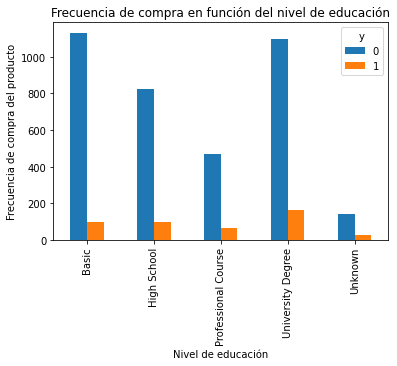

In [ ]:
%matplotlib inline
pd.crosstab(df.education, df.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

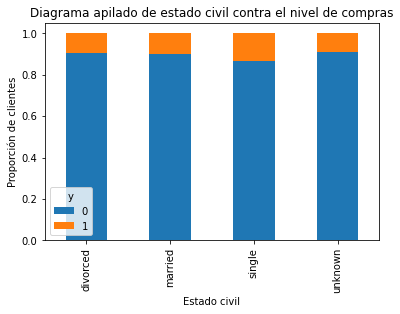

In [ ]:
table=pd.crosstab(df.marital, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

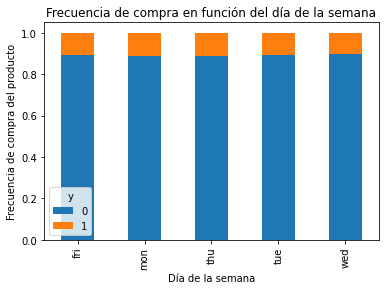

In [ ]:
%matplotlib inline
table= pd.crosstab(df.day_of_week, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

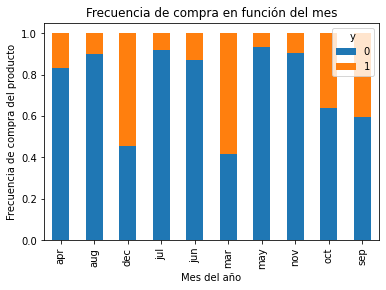

In [ ]:
table= pd.crosstab(df.month, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

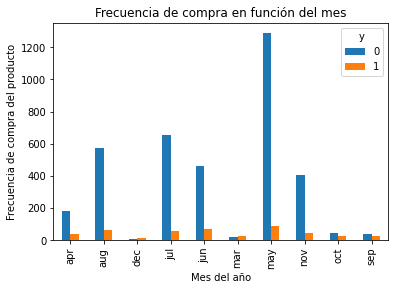

In [ ]:
table.plot(kind="bar", stacked=False)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

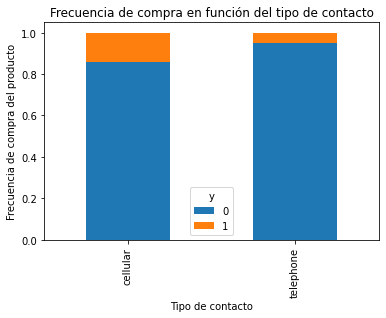

In [ ]:
table= pd.crosstab(df.contact, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del tipo de contacto")
plt.xlabel("Tipo de contacto")
plt.ylabel("Frecuencia de compra del producto")

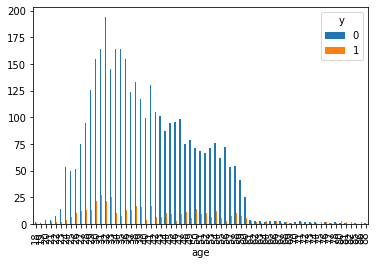

In [ ]:
pd.crosstab(df.age, df.y).plot(kind="bar")

In [ ]:
# Calculando el gini individual caso continuo
####################################################
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
# Ingreso: 29.327%
logi=LogisticRegression() # Generando objeto
bgini=df.loc[:,['cons.price.idx']] # Generando base con variable
logi.fit(bgini,df.y) # Entrenamiento
2*roc_auc_score(df.y,logi.predict_proba(bgini)[:,1])-1 

0.1562945060897023

In [ ]:
def gini(input_1, variable, target):
    logi=LogisticRegression() # Generando objeto
    bgini=input_1.loc[:,[variable]] # Generando base con variable
    logi.fit(bgini,input_1[target]) # Entrenamiento
    gini=2*roc_auc_score(input_1[target],logi.predict_proba(bgini)[:,1])-1 
    result = pd.DataFrame(columns=['Variable','Gini'])
    result.loc[len(result)]=[variable,gini] 
    return(result)

In [ ]:
var_cuanti_1=pd.DataFrame(df.dtypes, columns = ['Tipo_columna']).reset_index()
var_cuanti_1['Tipo_columna_2'] = pd.factorize(var_cuanti_1["Tipo_columna"])[0]
var_cuanti_1=var_cuanti_1[var_cuanti_1['Tipo_columna_2'].isin([0,2])]
var_cuanti_1=var_cuanti_1["index"].tolist()
#var_cuanti_1.pop(20)
#var_cuanti_1[var_cuanti_1['Tipo_columna'] =="int64"]
#var_cuanti_1.iloc[2:]
var_cuanti_1.pop(10)
var_cuanti_1

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
result_f3 = pd.DataFrame(columns=['Variable','Gini'])
for i in var_cuanti_1:
    A=gini(df,i,"y")
    result_f3.loc[len(result_f3)]=[A.loc[0].values[0],A.loc[0].values[1]]
    result_f3 = result_f3.sort_values('Gini',ascending=False)
result_f3

,Variable,Gini
1,duration,0.643265
8,euribor3m,0.491628
9,nr.employed,0.491032
5,emp.var.rate,0.412654
4,previous,0.243920
3,pdays,0.205669
6,cons.price.idx,0.156295
2,campaign,0.107061
7,cons.conf.idx,0.085779
0,age,0.042288


In [ ]:
def gini_2(input_1,variable,target):
    base_f = input_1.loc[:,[variable]]
    base=input_1.loc[:,[variable]]
    cat_dummies = pd.get_dummies(base[variable], prefix=variable)
    base = base.join(cat_dummies)
    d_vars = base.columns.values.tolist()
    to_keep = [v for v in d_vars if v not in base_f]
    base=base[to_keep]
    logi=LogisticRegression() # Generando objeto
    logi.fit(base,input_1[target]) # Entrenamiento
    gini=2*roc_auc_score(input_1[target],logi.predict_proba(base)[:,1])-1 
    result = pd.DataFrame(columns=['Variable','Gini'])
    result.loc[len(result)]=[variable,gini] 
    return(result)

In [ ]:
gini_2(df,'job',"y")

,Variable,Gini
0,job,0.215267


In [ ]:
var_cuali=['job','marital','education','housing','loan','day_of_week','month','contact']

result_f2 = pd.DataFrame(columns=['Variable','Gini'])
for i in var_cuali:
    A=gini_2(df,i,"y")
    result_f2.loc[len(result_f2)]=[A.loc[0].values[0],A.loc[0].values[1]]
    result_f2 = result_f2.sort_values('Gini',ascending=False)
result_f2

,Variable,Gini
6,month,0.308050
0,job,0.215267
7,contact,0.210711
2,education,0.127395
1,marital,0.074464
5,day_of_week,0.019760
4,loan,0.018898
3,housing,0.007432


In [ ]:
vf_continuas=result_f3[result_f3.Gini>0.05]["Variable"].tolist()
vf_categoricas=result_f2[result_f2.Gini>0.05]["Variable"].tolist()
print(vf_categoricas)
vf_categoricas+vf_continuas

['month', 'job', 'contact', 'education', 'marital']


['month',
 'job',
 'contact',
 'education',
 'marital',
 'duration',
 'euribor3m',
 'nr.employed',
 'emp.var.rate',
 'previous',
 'pdays',
 'cons.price.idx',
 'campaign',
 'cons.conf.idx']

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


## Variables categóricas / dummies

In [ ]:
#Filtrado de data
df_model=df[vf_categoricas+vf_continuas]
df_model.head()

,month,job,contact,education,marital,duration,euribor3m,nr.employed,emp.var.rate,previous,pdays,cons.price.idx,campaign,cons.conf.idx
0,may,blue-collar,cellular,Basic,married,487,1.313,5099.1,-1.8,0,999,92.893,2,-46.2
1,may,services,telephone,High School,single,346,4.855,5191.0,1.1,0,999,93.994,4,-36.4
2,jun,services,telephone,High School,married,227,4.962,5228.1,1.4,0,999,94.465,1,-41.8
3,jun,services,telephone,Basic,married,17,4.959,5228.1,1.4,0,999,94.465,3,-41.8
4,nov,admin.,cellular,University Degree,married,58,4.191,5195.8,-0.1,0,999,93.200,1,-42.0


In [ ]:
for category in vf_categoricas:
    cat_list = "cat"+ "_" + category
    cat_dummies = pd.get_dummies(df_model[category], prefix=category)#.iloc[:,1:] #AGREGANDO ESTO PARA ELIMINAR DUMMYS REDUNDANTES
    df_model = df_model.join(cat_dummies)

df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   month                          4119 non-null   object 
 1   job                            4119 non-null   object 
 2   contact                        4119 non-null   object 
 3   education                      4119 non-null   object 
 4   marital                        4119 non-null   object 
 5   duration                       4119 non-null   int64  
 6   euribor3m                      4119 non-null   float64
 7   nr.employed                    4119 non-null   float64
 8   emp.var.rate                   4119 non-null   float64
 9   previous                       4119 non-null   int64  
 10  pdays                          4119 non-null   int64  
 11  cons.price.idx                 4119 non-null   float64
 12  campaign                       4119 non-null   i

In [ ]:
data_vars = df_model.columns.values.tolist()
to_keep = [v for v in data_vars if v not in vf_categoricas]

In [ ]:
X = df_model[to_keep]
X.head()

,duration,euribor3m,nr.employed,emp.var.rate,previous,pdays,cons.price.idx,campaign,cons.conf.idx,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,education_Basic,education_High School,education_Professional Course,education_University Degree,education_Unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,487,1.313,5099.1,-1.8,0,999,92.893,2,-46.2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
1,346,4.855,5191.0,1.1,0,999,93.994,4,-36.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,227,4.962,5228.1,1.4,0,999,94.465,1,-41.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
3,17,4.959,5228.1,1.4,0,999,94.465,3,-41.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,58,4.191,5195.8,-0.1,0,999,93.200,1,-42.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0


In [ ]:
Y = df['y']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### Selección de Rasgos

In [ ]:
n = 8
from sklearn import datasets
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr, n, step = 1)
rfe = rfe.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print(rfe.support_)

[False  True False False  True False False False False False False  True
  True  True  True  True False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False]


In [ ]:
print(rfe.ranking_)

[32  1 28 18  1 34 23 19 20 30  7  1  1  1  1  1 26  5  6  3 15 10 31 13
  2 11 21 29  4  1 33 16  8 27 22 12 14  9 17 24 25 35]


In [ ]:
z=zip(to_keep,rfe.support_, rfe.ranking_)
list(z)

[('duration', False, 32),
 ('euribor3m', True, 1),
 ('nr.employed', False, 28),
 ('emp.var.rate', False, 18),
 ('previous', True, 1),
 ('pdays', False, 34),
 ('cons.price.idx', False, 23),
 ('campaign', False, 19),
 ('cons.conf.idx', False, 20),
 ('month_apr', False, 30),
 ('month_aug', False, 7),
 ('month_dec', True, 1),
 ('month_jul', True, 1),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', False, 26),
 ('month_oct', False, 5),
 ('month_sep', False, 6),
 ('job_admin.', False, 3),
 ('job_blue-collar', False, 15),
 ('job_entrepreneur', False, 10),
 ('job_housemaid', False, 31),
 ('job_management', False, 13),
 ('job_retired', False, 2),
 ('job_self-employed', False, 11),
 ('job_services', False, 21),
 ('job_student', False, 29),
 ('job_technician', False, 4),
 ('job_unemployed', True, 1),
 ('job_unknown', False, 33),
 ('contact_cellular', False, 16),
 ('contact_telephone', False, 8),
 ('education_Basic', False, 27),
 ('education_High School', 

In [ ]:
cols = ['euribor3m', 'previous', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'job_unemployed']

In [ ]:
x_f = X[cols]
logit_model_1 = LogisticRegression()
logit_model_2 = LogisticRegression()
logit_model_1.fit(x_f,Y)
logit_model_2.fit(X, Y)
print(logit_model_1.score(x_f,Y))
print(logit_model_2.score(X,Y))
print(pd.DataFrame(list(zip(x_f.columns, np.transpose(logit_model_1.coef_)))))
print(pd.DataFrame(list(zip(X.columns, np.transpose(logit_model_2.coef_)))))

0.8968196164117505
0.9150279193979121
                0                      1
0       euribor3m  [-0.5192906455806535]
1        previous   [0.3553040233923786]
2       month_dec   [0.7799052550594537]
3       month_jul  [0.41856758485579343]
4       month_jun   [0.5321053263394271]
5       month_mar   [1.2088480950796512]
6       month_may  [-0.8610913373086414]
7  job_unemployed  [0.31522971187731985]
                                0                         1
0                        duration     [0.00500816822423375]
1                       euribor3m    [-0.21304660695791558]
2                     nr.employed   [-0.008516678714126475]
3                    emp.var.rate    [-0.12239063337080554]
4                        previous    [-0.01811187384402957]
5                           pdays  [-0.0013905152890881555]
6                  cons.price.idx      [0.4734631153404815]
7                        campaign    [-0.04685283923328958]
8                   cons.conf.idx    [0.0602524239119

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
def Gini(y_true,y_pred,signo='+'):
    from sklearn.metrics import roc_auc_score
    return 2*roc_auc_score(y_true, y_pred)-1

In [ ]:
probs_1 = logit_model_1.predict_proba(x_f)[:,1:]
m_1=pd.DataFrame(probs_1,columns = ['Probs'])
probs_2 = logit_model_2.predict_proba(X)[:,1:]
m_2=pd.DataFrame(probs_2,columns = ['Probs'])

In [ ]:
Y2=Y.reset_index()
Y2['Probs_1']=m_1
Y2['Probs_2']=m_2

In [ ]:
X

,duration,euribor3m,nr.employed,emp.var.rate,previous,pdays,cons.price.idx,campaign,cons.conf.idx,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,education_Basic,education_High School,education_Professional Course,education_University Degree,education_Unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,487,1.313,5099.1,-1.8,0,999,92.893,2,-46.2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
1,346,4.855,5191.0,1.1,0,999,93.994,4,-36.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,227,4.962,5228.1,1.4,0,999,94.465,1,-41.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
3,17,4.959,5228.1,1.4,0,999,94.465,3,-41.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,58,4.191,5195.8,-0.1,0,999,93.200,1,-42.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,53,4.958,5228.1,1.4,0,999,93.918,1,-42.7,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4115,219,4.959,5228.1,1.4,0,999,93.918,1,-42.7,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
4116,64,1.354,5099.1,-1.8,1,999,92.893,2,-46.2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4117,528,4.966,5228.1,1.4,0,999,93.444,1,-36.1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


In [ ]:
print(1*Gini(Y2["y"],Y2["Probs_2"]))
print(1*Gini(Y2["y"],Y2["Probs_1"]))

0.8654510635519757
0.5458504909724424


In [ ]:
threshold = 0.5
Y2["prediction_1"]=np.where(probs_1>threshold, 1, 0)
Y2["prediction_2"]=np.where(probs_2>threshold, 1, 0)

In [ ]:
confusion_matrix_1 = pd.crosstab(Y2.prediction_1, Y2.y)
confusion_matrix_2 = pd.crosstab(Y2.prediction_2, Y2.y)
print(confusion_matrix_1)
print(confusion_matrix_2)

y                0    1
prediction_1           
0             3644  401
1               24   50
y                0    1
prediction_2           
0             3573  255
1               95  196


In [ ]:
TN_1=confusion_matrix_1[0][0]
TP_1=confusion_matrix_1[1][1]
FN_1=confusion_matrix_1[0][1]
FP_1=confusion_matrix_1[1][0]
final_1=(TP_1+TN_1)/(TN_1+TP_1+FN_1+FP_1)
TN_2=confusion_matrix_2[0][0]
TP_2=confusion_matrix_2[1][1]
FN_2=confusion_matrix_2[0][1]
FP_2=confusion_matrix_2[1][0]
final_2=(TP_2+TN_2)/(TN_2+TP_2+FN_2+FP_2)
print(final_1)
print(final_2)

0.8968196164117505
0.9150279193979121


### Cross Validation

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
# En train (Tasa de aciertos)
cv_train_ta=cross_val_score(logit_model_2,X,Y,cv=10)
np.mean(cv_train_ta) 

0.9130837644390899

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.1,
                                           random_state=8)

In [ ]:
logit_model_2.fit(Xtrain,ytrain)
print(logit_model_2.score(Xtrain,ytrain))
print(logit_model_2.score(Xtest,ytest))
probs = logit_model_2.predict_proba(Xtrain)[:,1:]

m=pd.DataFrame(probs,columns = ['Probs'])

Y2=ytrain.reset_index()
Y2['Probs']=m

print(1*Gini(Y2["y"],Y2["Probs"]))

probs = logit_model_2.predict_proba(Xtest)[:,1:]

m=pd.DataFrame(probs,columns = ['Probs'])

Y2=ytest.reset_index()
Y2['Probs']=m

print(1*Gini(Y2["y"],Y2["Probs"]))

0.9163744267601834
0.9101941747572816
0.8667878528332202
0.8629316234824198


In [ ]:
cv_train_gini=cross_val_score(logit_model_2,Xtrain,ytrain,
                              cv=10,scoring='accuracy')
print(np.mean(cv_train_gini))

cv_test_gini=cross_val_score(logit_model_1,Xtest,ytest,
                             cv=10,scoring='accuracy')
print(np.mean(cv_test_gini))

0.9139484228163475
0.8885017421602788


## Variables WOEs

In [ ]:
df_model_w_c0=df[vf_continuas]
df_model_w_ca=df[vf_categoricas]
Y_w = df['y']
df_model_w_c0['y']=df['y']
df_model_w_ca['y']=df['y']
print(df_model_w_c0['pdays'].unique())
print(df_model_w_c0['previous'].unique())
df_model_w_c0 = df_model_w_c0.drop(['previous', 'pdays'], axis=1)

[999  12   3   6   5   2  10  11   7   1  18   4  15   0  16   9  19  17
  13  21  14]
[0 2 1 3 5 4 6]


In [ ]:
vf_continuas = ['duration','euribor3m','nr.employed','emp.var.rate','cons.price.idx','campaign','cons.conf.idx']

In [ ]:
def woe_ca(df,variable,target):
    woe=df.groupby([variable])[target].agg([('Target','mean'),('Total','count'),('Malos','sum')]).reset_index()
    woe['Buenos']=woe.Total-woe.Malos 
    woe['WOE']=np.log((woe.Buenos/np.sum(woe.Buenos))/(woe.Malos/np.sum(woe.Malos)))
    cats = woe[variable].unique()
    wos = woe['WOE'].unique()

    for i in range(len(cats)):
      df[variable] = df[variable].replace(to_replace= cats[i], value = wos[i])
    
    return(df)

def woe_co(df,variable,target):
    disc = dsc.EqualFrequencyDiscretiser(q=6, variables=[variable])
    disc.fit(df)
    df_t= disc.transform(df)
    df[variable] = df_t[variable]
    woe=df.groupby([variable])[target].agg([('Target','mean'),('Total','count'),('Malos','sum')]).reset_index()
    woe['Buenos']=woe.Total-woe.Malos 
    woe['WOE']=np.log((woe.Buenos/np.sum(woe.Buenos))/(woe.Malos/np.sum(woe.Malos)))
    cats = woe[variable].unique()
    wos = woe['WOE'].unique()

    for i in range(len(cats)):
      df[variable] = df[variable].replace(to_replace= cats[i], value = wos[i])
    
    return(df)


In [ ]:
for col in vf_continuas:
  df_model_w_c0 = woe_co(df_model_w_c0,col,'y')

df_model_w_c0['previous'] = df['previous']
df_model_w_c0['previous'] = woe_ca(df_model_w_c0, 'previous', 'y')

for col in vf_categoricas:
  df_model_w_ca = woe_ca(df_model_w_ca,col,'y')

df_model_w_c0 = df_model_w_c0.drop(['y'], axis=1)
df_model_w_ca = df_model_w_ca.drop(['y'], axis=1)

df_model_w = pd.concat([df_model_w_c0, df_model_w_ca], axis=1, sort=False)
df_model_w

,duration,euribor3m,nr.employed,emp.var.rate,cons.price.idx,campaign,cons.conf.idx,previous,month,job,contact,education,marital
0,-1.512221,-0.019623,-0.922388,-0.723448,-0.507850,-0.109033,-0.146064,-1.512221,0.565102,0.506148,-0.292246,0.351722,0.096428
1,-0.219915,1.246422,1.283699,1.282335,1.282335,-0.024504,-0.252450,-0.219915,0.565102,0.229250,0.811110,0.043525,-0.233606
2,0.324838,0.742069,0.767052,0.753017,-0.520063,-0.109033,0.870626,0.324838,-0.179877,0.229250,0.811110,0.043525,0.096428
3,3.064557,0.742069,0.767052,0.753017,-0.520063,-0.024504,0.870626,3.064557,-0.179877,0.229250,0.811110,0.351722,0.096428
4,3.064557,1.246422,0.767052,-0.563378,-0.023273,-0.109033,0.870626,3.064557,0.141802,-0.207499,-0.292246,-0.199724,0.096428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,3.064557,0.747370,0.767052,0.753017,0.264920,-0.109033,0.580617,3.064557,0.306573,-0.207499,-0.292246,0.351722,0.096428
4115,0.324838,0.742069,0.767052,0.753017,0.264920,-0.109033,0.580617,0.324838,0.306573,-0.207499,0.811110,0.043525,0.096428
4116,3.064557,-0.019623,-0.922388,-0.723448,-0.507850,-0.109033,-0.146064,3.064557,0.565102,-0.897239,-0.292246,0.043525,-0.233606
4117,-1.512221,0.895440,0.767052,0.753017,0.303893,-0.109033,0.993130,-1.512221,0.094321,-0.207499,-0.292246,0.043525,0.096428


### Selección de Rasgos

In [ ]:
n = 8
from sklearn import datasets
from sklearn.feature_selection import RFE
lr2 = LogisticRegression()
rfe2 = RFE(lr2, n, step = 1)
rfe2 = rfe.fit(df_model_w,Y_w)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False  True False  True  True  True  True  True
 False]
[1 1 5 6 2 1 3 1 1 1 1 1 4]


In [ ]:
cols2 = ['duration', 'euribor3m', 'campaign', 'previous', 'month', 'job', 'contact', 'education']

In [ ]:
x_w = df_model_w[cols2]
logit_model_w_1 = LogisticRegression()
logit_model_w_2 = LogisticRegression()
logit_model_w_1.fit(x_w,Y_w)
logit_model_w_2.fit(df_model_w, Y_w)
print(logit_model_w_1.score(x_w,Y_w))
print(logit_model_w_2.score(df_model_w, Y_w))

probs_w_1 = logit_model_w_1.predict_proba(x_w)[:,1:]
w_1=pd.DataFrame(probs_w_1,columns = ['Probs'])
probs_w_2 = logit_model_w_2.predict_proba(df_model_w)[:,1:]
w_2=pd.DataFrame(probs_w_2,columns = ['Probs'])

Y_w_2=Y_w.reset_index()
Y_w_2['Probs_1']=w_1
Y_w_2['Probs_2']=w_2

print(1*Gini(Y_w_2["y"],Y_w_2["Probs_2"]))
print(1*Gini(Y_w_2["y"],Y_w_2["Probs_1"]))

threshold = 0.5
Y_w_2["prediction_1"]=np.where(probs_w_1>threshold, 1, 0)
Y_w_2["prediction_2"]=np.where(probs_w_2>threshold, 1, 0)

confusion_matrix_w_1 = pd.crosstab(Y_w_2.prediction_1, Y_w_2.y)
confusion_matrix_w_2 = pd.crosstab(Y_w_2.prediction_2, Y_w_2.y)
print(confusion_matrix_w_1)
print(confusion_matrix_w_2)

0.9024034959941734
0.9004612770089827
0.835509723938322
0.8346211133867065
y                0    1
prediction_1           
0             3574  308
1               94  143
y                0    1
prediction_2           
0             3571  313
1               97  138


### Cross Validation

In [ ]:
#COMO SE VE ARRIBA, LA CAPACIDAD PREDICTIVA ES PRACTICAMENTE IGUAL USANDO LAS 8 VARIABLES SELECCIONADAS, POR TANTO 
#SE USARAN ESTAS
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
# En train (Tasa de aciertos)
cv_train_ta=cross_val_score(logit_model_w_1,x_w,Y_w,cv=10)
np.mean(cv_train_ta) 

0.9019204875628942

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,Ytrain,Ytest=train_test_split(x_w,Y_w,test_size=0.1,
                                           random_state=8)

In [ ]:
t_logit_model_w = LogisticRegression()
t_logit_model_w.fit(xtrain,Ytrain)
print(t_logit_model_w.score(xtrain,Ytrain))
print(t_logit_model_w.score(xtest,Ytest))

probs = t_logit_model_w.predict_proba(xtrain)[:,1:]
m_t=pd.DataFrame(probs,columns = ['Probs'])
Y_t_2=Ytrain.reset_index()
Y_t_2['Probs']=m_t

print(1*Gini(Y_t_2["y"],Y_t_2["Probs"]))

probs_t = t_logit_model_w.predict_proba(xtest)[:,1:]
m_t=pd.DataFrame(probs_t,columns = ['Probs'])
Y_t_2=Ytest.reset_index()
Y_t_2['Probs']=m_t

print(1*Gini(Y_t_2["y"],Y_t_2["Probs"]))

0.9031561909900189
0.8980582524271845
0.8308131774010579
0.8674515162663583


In [ ]:
cv_train_gini=cross_val_score(t_logit_model_w,xtrain,Ytrain,
                              cv=10,scoring='accuracy')
print(np.mean(cv_train_gini))

cv_test_gini=cross_val_score(t_logit_model_w,xtest,Ytest,
                             cv=10,scoring='accuracy')
print(np.mean(cv_test_gini))

0.9031550957966055
0.8908826945412311
